In [2]:
from numpy import *
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename

plt.style.use(astropy_mpl_style)

In [3]:
path = os.path.expanduser('~/Desktop/Data/')
os.path.exists(path)

True

In [5]:
file = fits.open(os.path.expanduser('~/Desktop/Data/CDFS_B_sci.fits'))
file[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 7000 / Axis length                                    
NAXIS2  =                 8400 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2012-03-20T01:58:15' / Date FITS file was generated                  
IRAF-TLM= '2012-03-20T01:58:20' / Time of last modification                     
OBJECT  = 'k11 rectified 501 6001' / Name of the object observed                
WCSDIM  =                    2                                                  
LTV2    =              -3638.5                                                  
LTM1_1  =                   

In [3]:
#For image file use get_pkg_data_filename
CDFS_B_image = get_pkg_data_filename(path+'CDFS_B_sci.fits')
fits.info(CDFS_B_image)
imdat = fits.getdata(CDFS_B_image, ext = 0)

Filename: /home/magnus/Desktop/Data/CDFS_B_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (7000, 8400)   float32   


In [ ]:
CDFS_B_image.

<Figure size 432x288 with 0 Axes>

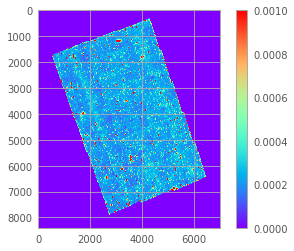

<Figure size 432x288 with 0 Axes>

In [5]:
plt.imshow(imdat, cmap='rainbow', vmin=0, vmax =0.001)
plt.colorbar()
plt.xlabel=('RA')
plt.ylabel=('DEC')
plt.figure()

In [5]:
CDFS_B_conv_image = get_pkg_data_filename(path+'CDFS_B_conv.fits')
fits.info(CDFS_B_conv_image)
imdatconv = fits.getdata(CDFS_B_conv_image, ext = 0)

Filename: /home/magnus/Desktop/Data/CDFS_B_conv.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (7000, 8400)   float32   


/tmp/ipykernel_394016/2965984757.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 576x432 with 0 Axes>

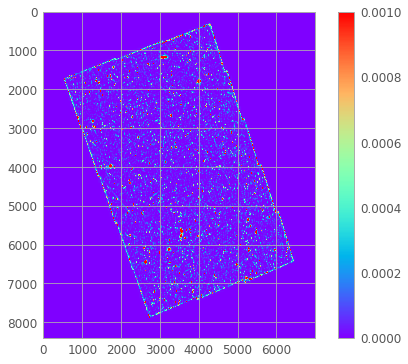

<Figure size 576x432 with 0 Axes>

In [6]:
plt.imshow(imdatconv, cmap='rainbow', vmin=0, vmax =0.001)
plt.colorbar()
plt.xlabel=('RA')
plt.ylabel=('DEC')
plt.figure()

In [7]:
#For .cat file use the following. The format given was arbitrary so it wouldn't complain
file = Table.read(os.path.expanduser('~/Desktop/Data/cdfs-catalogs/cdfs/cdfs.v1.6.9.3dhst.v0.4.cat'), format = 'ascii')
Table(file)

id_zf,id_3dhst,use_3dhst,group_size
int64,int64,int64,int64
1,-99,-99,-99
2,-99,-99,-99
3,-99,-99,-99
4,-99,-99,-99
5,-99,-99,-99
6,-99,-99,-99
7,-99,-99,-99
8,-99,-99,-99
9,-99,-99,-99


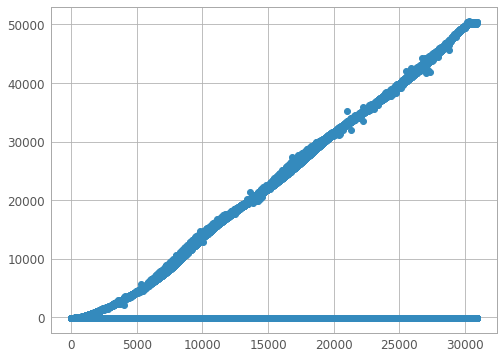

In [8]:
zf = file['id_zf']
# mask = 
hst = file['id_3dhst']
plt.scatter(zf,hst)
# plt.xaxis('id')
# plt.yaxis('3dhst')

In [9]:
comp_ew = Table.read(os.path.expanduser(path+'/EELG-stuff/comp_ew.dat'), format ='ascii')
# Table(comp_ew)
xy = comp_ew.to_pandas()
pd.set_option('display.max_rows', 20)
xy

,col1,col2,col3,col4
0,20366,3.531,2578,80
1,112105,3.411,2578,80
2,11462,3.810,2578,80
3,12533,3.545,2578,80
4,12552,3.195,2578,80
...,...,...,...,...
100,27445,2.615,599,5
101,28374,3.473,599,5
102,101824,3.197,599,5
103,109884,3.393,599,5


In [10]:
# ids = xy['col1']
# mask_CDFS = ids<100000
# cdfs_1 = ids[mask_CDFS]
# rdshft = xy['col2']
# cdfs_2 = rdshft[mask_CDFS]
# cdfs_1
# Table(cdfs_1)
# xyz = cdfs_1.to_pandas()
# print(ids)
# potato = vstack([cdfs_1,cdfs_2])
# Table(potato)
# potato
# potato2 = potato.to_pandas()
# potato

xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
stuff
#trial = df.drop(['x','y'],axis=1)

#It looks like these 105 galaxies are probably the ones you want. From these the one's less than 100,000 are in the CDFS
#range. If I can select these and then cross reference their ID with the .cat file I can get the redshift.
#Then I can combine that with the rest of the .cat file photometric data to make my observations.dat file. 

,id,redshift
0,20366,3.531
2,11462,3.810
3,12533,3.545
4,12552,3.195
5,12903,3.097
...,...,...
97,23511,3.444
98,24259,3.509
99,26616,3.521
100,27445,2.615


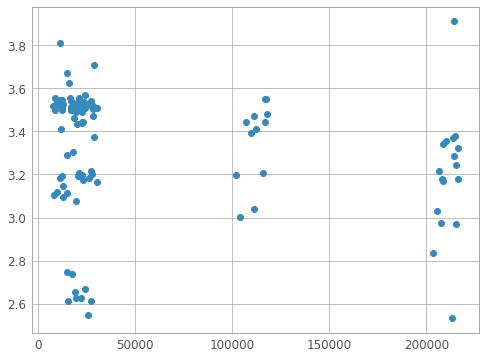

In [11]:
# hello
gaxID = comp_ew['col1']
Redshift = comp_ew['col2']
Oxwidth = comp_ew['col3']
Oxwidth_err = comp_ew['col4']
# print(comp_ew)
plt.scatter(gaxID,Redshift)

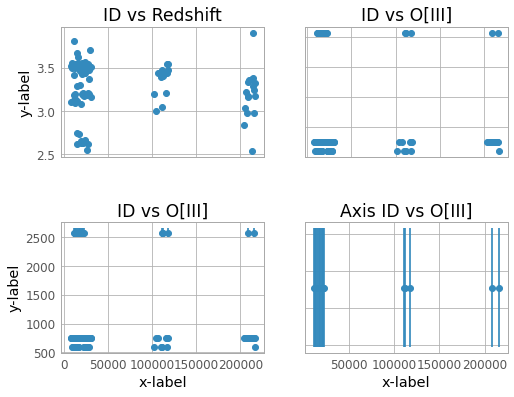

In [12]:
mask = Oxwidth>2000
highox = Oxwidth[mask]

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(gaxID, Redshift)
axs[0, 0].set_title('ID vs Redshift')
axs[0, 1].scatter(gaxID, Oxwidth)#, 'tab:orange')
axs[0, 1].set_title('ID vs O[III]')
axs[1, 0].errorbar(gaxID, Oxwidth, yerr = Oxwidth_err, fmt='o')#, 'tab:green')
axs[1, 0].set_title('ID vs O[III]')
axs[1, 1].errorbar(gaxID[mask], highox, yerr=Oxwidth_err[mask], fmt='o')#, 'tab:red')
axs[1, 1].set_title('Axis ID vs O[III]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# plt.scatter(gaxID,Oxwidth)
# plt.errorbar(gaxID,Oxwidth, yerr=Oxwidth_err, fmt='o')

# ax = fig.add_subplot(2,2,1)
# plt.scatter(gaxID[mask], highox)
# plt.errorbar(gaxID[mask],highox,yerr=Oxwidth_err[mask],fmt='o')
# plt.xlabel('id')
# plt.ylabel('Redshift')

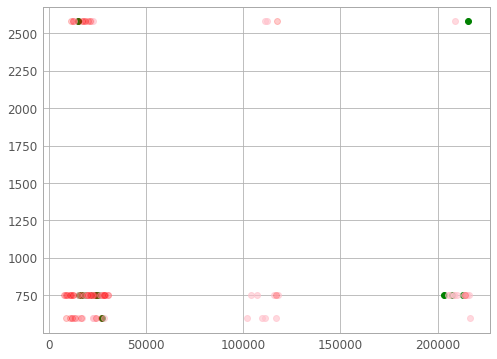

In [13]:
cmask1 = Redshift <3
cmask2 = (Redshift >3 )& (Redshift <3.5)
cmask3 = Redshift >3.5
# fig, ax = plt.plot
# ax.set_yscale('log')
plt.scatter(gaxID[cmask1], Oxwidth[cmask1], c='green')
plt.scatter(gaxID[cmask2], Oxwidth[cmask2], c='pink', alpha =0.6)
plt.scatter(gaxID[cmask3], Oxwidth[cmask3], c='red', marker = 'o',alpha = 0.2)
# plt.errorbar(gaxID,highox,yerr=Oxwidth_err[mask],fmt='o')
#GALAXY IDS ARE LISTED AS ID_HERE = ZFOURGE CATALOG ID + FIELD ID, WHERE 
###  FIELD IDS ARE AS FOLLOWS:
###    ID_CDFS  =  0
###    ID_COSMOS = 100000
###    ID_UDS  =   200000

In [14]:
obsdat = Table.read(os.path.expanduser('~/Documents/magphys/eg_user_files/observations.dat'), format ='ascii')
Table(obsdat)

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4732,0.45642,3.733e-06,3.731e-07,5.2e-06,1.537e-07,9.727e-06,2.725e-07,1.837e-05,5.145e-07,2.679e-05,7.506e-07,3.311e-05,9.277e-07,4.325e-05,1.212e-06,7.447e-05,7.517e-06,0.0001079,4.051e-06,9.612e-05,3.607e-06,9.333e-05,3.504e-06,0.0001552,5.825e-06,0.0,0.0,0.000288,1.504e-05,0.003056,0.001019,0.00544,0.000426,0.01813,0.001173,0.02281,0.001771,-99.0,-99.0,-99.0,-99.0
2326,1.1407,6.855e-07,6.852e-08,7.244e-07,2.887e-08,1e-06,4.713e-08,1.419e-06,5.655e-08,2.679e-06,9.046e-08,4.406e-06,1.488e-07,5.754e-06,1.943e-07,1.086e-05,3.477e-06,2.884e-05,1.082e-06,2.535e-05,9.515e-07,2.318e-05,8.772e-07,3.802e-05,1.435e-06,0.000198,1.554e-05,0.0001438,1.23e-05,0.003184,0.001061,0.00691,0.000342,0.008433,0.000575,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
4170,0.63819,3.192e-06,3.19e-07,5.152e-06,1.523e-07,8.395e-06,2.352e-07,1.871e-05,5.241e-07,3.311e-05,9.277e-07,3.981e-05,1.115e-06,5.754e-05,1.612e-06,0.000118,9.664e-06,0.0001782,6.686e-06,0.0001265,4.746e-06,0.0001785,6.699e-06,0.0001932,7.252e-06,0.0007193,3.737e-05,0.001209,2.061e-05,0.01106,0.001202,0.03042,0.000748,0.03479,0.000792,0.02395,0.002415,0.01022,0.001694,-99.0,-99.0


In [15]:
fildat = Table.read(os.path.expanduser('~/Documents/magphys/eg_user_files/filters.dat'), format ='ascii')
Table(fildat)

name,lambda_eff,filter_id,fit?
str8,float64,int64,int64
U,0.346,222,1
B,0.46,223,1
V,0.538,224,1
R,0.652,225,1
I,0.866,226,1
z,0.906,227,1
J,1.2,120,1
Ks,2.2,122,1
IRAC1,3.56,153,1


In [16]:
# pd.set_option('display.max_rows', None)
v1 = Table.read(os.path.expanduser(path+'cdfs-catalogs/cdfs/cdfs.v1.6.11.cat'), format ='ascii')
Table(v1)

id,x,y,ra,dec,SEflags,iso_area,fap_Ksall,eap_Ksall,apcorr,Ks_ratio,fapcirc07_Ksall,eapcirc07_Ksall,apcorr07,fcirc07_Ksall,ecirc07_Ksall,fauto_Ksall,flux50_radius,a_vector,b_vector,kron_radius,f_Ksall,e_Ksall,w_Ksall,f_B,e_B,w_B,f_I,e_I,w_I,f_R,e_R,w_R,f_U,e_U,w_U,f_V,e_V,w_V,f_Z,e_Z,w_Z,f_Hs,e_Hs,w_Hs,f_Hl,e_Hl,w_Hl,f_J1,e_J1,w_J1,f_J2,e_J2,w_J2,f_J3,e_J3,w_J3,f_Ks,e_Ks,w_Ks,f_KsHI,e_KsHI,w_KsHI,f_NB118,e_NB118,w_NB118,f_NB209,e_NB209,w_NB209,f_F098M,e_F098M,w_F098M,f_F105W,e_F105W,w_F105W,f_F125W,e_F125W,w_F125W,f_F140W,e_F140W,w_F140W,f_F160W,e_F160W,w_F160W,f_F814W,e_F814W,w_F814W,f_IA484,e_IA484,w_IA484,f_IA527,e_IA527,w_IA527,f_IA574,e_IA574,w_IA574,f_IA598,e_IA598,w_IA598,f_IA624,e_IA624,w_IA624,f_IA651,e_IA651,w_IA651,f_IA679,e_IA679,w_IA679,f_IA738,e_IA738,w_IA738,f_IA767,e_IA767,w_IA767,f_IA797,e_IA797,w_IA797,f_IA856,e_IA856,w_IA856,f_WFI_V,e_WFI_V,w_WFI_V,f_WFI_Rc,e_WFI_Rc,w_WFI_Rc,f_WFI_U38,e_WFI_U38,w_WFI_U38,f_tenisK,e_tenisK,w_tenisK,f_IRAC_36,e_IRAC_36,w_IRAC_36,f_IRAC_45,e_IRAC_45,w_IRAC_45,f_IRAC_58,e_IRAC_58,w_IRAC_58,f_IRAC_80,e_IRAC_80,w_IRAC_80,wmin_optical,wmin_hst_optical,wmin_fs,wmin_jhk,wmin_hst,wmin_irac,wmin_all,star,nearstar,use,snr,use_nosnr,z_spec
int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,int64,float64
1,4078.527,203.09,53.1001053,-27.9667282,19,5484.0,73.393,0.2637293,0.9967781,9.594949,34.08386,0.1354919,1.774505,60.48199,0.240431,706.4783,34.925,53.175,15.848,67.639,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,7.061513368,0.07410368952,0.92,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,16.62546307,0.2324267408,1.0,25.17104154,0.2439040412,1.0,34.9238916,0.613480158,1.0,48.00966709,0.24245435280000002,1.0,49.04863393,0.2720271422,1.0,75.91582359,0.21379932229999998,1.0,96.86429775999999,0.2689598736,1.0,147.19752960000002,0.29309089920000003,1.0,167.8650363,0.7446007608,1.0,191.6631665,0.8417359535,1.0,233.32364489999998,1.13357287,1.0,25.819982239999998,0.23645213939999998,0.78,72.09070687999998,0.21189922879999998,0.77,6.226659704999999,0.7545792289000001,0.76,755.4762698000001,1.4414241030000001,0.82,813.0790464999999,0.41053248249999996,0.1,529.4179085000001,0.655457046,0.14,404.979993,16.45545297,0.02,268.287838,6.683688200000001,0.18,0.0,0.0,0.0,0.0,0.0,1330.8,0.1,0,0,0,251.5565,0,-99.0
2,6292.975,55.927,52.9956322,-27.9728031,2,315.0,9.561428,0.251456,1.058802,3.034702,5.381519,0.1291864,1.774505,9.549533,0.229242,27.40463,4.255,4.049,3.699,9.017,29.047997688000002,0.83641094109,0.11,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,3.844524656,0.0318021732,0.52,-99.0,-99.0,0.0,-99.0,

In [17]:
#Confirmed that the id still matches the data in the condensed graph below
print(v1[[20365]])

  id     x        y         ra         dec     ... use   snr    use_nosnr z_spec
----- -------- -------- ---------- ----------- ... --- -------- --------- ------
20366 4108.222 5049.613 53.0987511 -27.7647896 ...   1 24.98318         1  -99.0


In [18]:
# x = v1['x']
# y = v1['y']
# plt.scatter(x,y)
# plt.figure()
# J1 = v1['f_J1']
# # J1 = (J1.astype(int))
# J2 = v1['f_J2']
# # J2 = (J2.astype(int))
# J3 = v1['f_J3']
# J3 = (J3.astype(int))
# print((J1,J2,J3))
# J123 = [J1;J2;J3]
# print(J123)
# print(J1)
# for i in range(0,len(J1)):
#     q=median(J1[i],J2[i],J3[i])
# print(q)
# print(J1[30894])
# # J123 = median(sort(J1,J2,J3))
# B = v1['f_B']
# Ks = v1['f_Ks']
# # B_J321 = B - J321
# # Ks_J321 = Ks - J321
# # plt.scatter(Ks_J321,B_J321)
# B_J2 = B-J2
# J2_Ks = J2-Ks
# plt.scatter(J2_Ks,B_J2)

In [19]:
df = v1.to_pandas()
df

,id,x,y,ra,dec,SEflags,iso_area,fap_Ksall,eap_Ksall,apcorr,...,wmin_jhk,wmin_hst,wmin_irac,wmin_all,star,nearstar,use,snr,use_nosnr,z_spec
0,1,4078.527,203.090,53.100105,-27.966728,19,5484.0,73.393000,0.263729,0.996778,...,0.0,0.0,1330.8,0.10,0,0,0,251.556500,0,-99.0
1,2,6292.975,55.927,52.995632,-27.972803,2,315.0,9.561428,0.251456,1.058802,...,0.0,0.0,0.0,0.00,0,0,0,41.657000,0,-99.0
2,3,1791.772,51.199,53.207989,-27.973034,2,375.0,10.821210,0.263729,1.048642,...,0.0,0.0,0.0,0.00,0,0,0,44.347300,0,-99.0
3,4,4181.315,176.410,53.095257,-27.967840,3,1060.0,76.361450,0.263729,1.001701,...,0.0,0.0,0.0,0.00,0,0,0,276.735100,0,-99.0
4,5,5997.950,48.860,53.009548,-27.973110,0,219.0,26.528060,0.251456,1.097179,...,0.0,0.0,0.0,0.00,0,0,0,155.910000,0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30906,30907,4150.499,7668.344,53.096783,-27.655676,0,124.0,3.934965,0.231306,1.108052,...,0.0,0.0,3497.2,0.13,0,0,0,20.555150,0,-99.0
30907,30908,3050.447,7621.582,53.148533,-27.657625,0,195.0,10.538200,0.202271,1.095816,...,0.0,0.0,17912.0,0.17,0,0,1,82.423640,1,-99.0
30908,30909,4385.049,7547.789,53.085751,-27.660698,0,18.0,0.742744,0.222892,1.216900,...,0.0,0.0,10068.0,0.14,0,0,0,4.709752,0,-99.0
30909,30910,3221.845,7527.777,53.140469,-27.661535,0,36.0,0.957734,0.196572,1.289988,...,0.0,0.0,20826.0,0.18,0,0,1,8.801145,1,-99.0


In [20]:
# merge(stuff,df)
# vertical_stack = pd.concat([stuff, df], axis=1)
# vertical_stack
# I've combined the cdfs.v1.6.11.cat file which has the observational data with comp_ew.dat which has the identities in the correct format and the redshift values
pd.set_option('display.max_columns', None)
merged_inner = pd.merge(left=stuff, right=df, left_on='id', right_on='id')
Test = merged_inner.drop(['x','y','ra','dec','SEflags','iso_area','fap_Ksall','eap_Ksall',
                         'apcorr','Ks_ratio','fapcirc07_Ksall','eapcirc07_Ksall','apcorr07',
                         'fcirc07_Ksall','ecirc07_Ksall','fauto_Ksall','flux50_radius',
                         'a_vector','b_vector','kron_radius','w_Ksall','w_B','w_I','w_R',
                         'w_U','w_V','w_Z','w_Hs','w_J1','w_J2','w_J3','w_Ks','w_KsHI',
                         'w_NB118','w_NB209','w_F098M','w_F105W','w_F125W','w_F140W','w_F160W',
                         'w_F814W','w_IA484','w_IA527','w_IA574','w_IA598','w_IA624','w_IA651',
                         'w_IA679','w_IA738','w_IA767','w_IA797','w_IA856','w_WFI_V','w_WFI_Rc',
                         'w_WFI_U38','w_tenisK','w_IRAC_36','w_IRAC_45','w_IRAC_58','w_IRAC_80',
                         'wmin_optical','wmin_hst_optical','wmin_fs','wmin_jhk','wmin_hst',
                         'wmin_irac','wmin_all','star','nearstar','use','snr','use_nosnr','z_spec','w_Hl'],axis=1) #Removed the convolved Ks band data
Test
#Next step. Cross reference these with filters. Create the filters document. convert these to files. 

,id,redshift,f_Ksall,e_Ksall,f_B,e_B,f_I,e_I,f_R,e_R,f_U,e_U,f_V,e_V,f_Z,e_Z,f_Hs,e_Hs,f_Hl,e_Hl,f_J1,e_J1,f_J2,e_J2,f_J3,e_J3,f_Ks,e_Ks,f_KsHI,e_KsHI,f_NB118,e_NB118,f_NB209,e_NB209,f_F098M,e_F098M,f_F105W,e_F105W,f_F125W,e_F125W,f_F140W,e_F140W,f_F160W,e_F160W,f_F814W,e_F814W,f_IA484,e_IA484,f_IA527,e_IA527,f_IA574,e_IA574,f_IA598,e_IA598,f_IA624,e_IA624,f_IA651,e_IA651,f_IA679,e_IA679,f_IA738,e_IA738,f_IA767,e_IA767,f_IA797,e_IA797,f_IA856,e_IA856,f_WFI_V,e_WFI_V,f_WFI_Rc,e_WFI_Rc,f_WFI_U38,e_WFI_U38,f_tenisK,e_tenisK,f_IRAC_36,e_IRAC_36,f_IRAC_45,e_IRAC_45,f_IRAC_58,e_IRAC_58,f_IRAC_80,e_IRAC_80
0,20366,3.531,1.340433,0.078106,0.072954,0.045559,0.415332,0.077627,0.440500,0.022025,-0.019202,0.014513,0.420450,0.041327,0.448588,0.103176,0.096105,0.368922,0.995944,0.368389,0.189382,0.211082,0.110408,0.215093,0.094598,0.248492,0.978833,0.557913,1.346783,0.082813,0.956836,0.507372,-1.644976,0.918947,-99.000000,-99.000000,0.421296,0.060074,0.414056,0.052993,0.505675,0.179152,0.456413,0.062890,0.425808,0.042398,0.163510,0.052899,0.265395,0.055347,0.504942,0.140285,0.438575,0.053828,0.449755,0.062382,0.354391,0.048933,0.388887,0.061775,0.581099,0.067094,0.086813,0.170555,0.574220,0.192649,-0.067911,0.255672,0.433209,0.053693,0.436695,0.048020,-0.054835,0.147416,1.066736,0.292849,0.411213,0.068629,0.607132,0.075825,0.866820,0.739835,0.715866,0.806867
1,11462,3.810,1.037996,0.080885,0.184874,0.052481,1.256559,0.070461,1.249834,0.062491,0.009689,0.015397,1.009020,0.038010,1.199445,0.094947,1.090588,0.474177,0.229681,0.456265,1.214523,0.223545,1.083732,0.224170,1.024071,0.282329,-0.125481,0.667411,1.049887,0.075034,0.905536,0.589747,0.896938,0.841526,-99.000000,-99.000000,1.217741,0.055541,1.088538,0.045563,0.852430,0.178131,1.096320,0.055679,1.198756,0.045154,0.370973,0.047903,0.700061,0.049797,1.436064,0.127048,1.380252,0.048743,1.224397,0.056803,1.162175,0.044662,1.201504,0.056418,1.136826,0.061340,1.081867,0.154214,1.140011,0.175400,1.024039,0.231872,0.677964,0.042897,1.132757,0.039506,-0.173074,0.141212,0.917342,0.276135,1.032816,0.057477,1.045007,0.078163,1.214578,0.556852,0.076377,0.723128
2,12533,3.545,3.297281,0.102327,0.257484,0.035386,1.042304,0.063071,1.006797,0.050340,-0.007225,0.015703,1.034417,0.032506,0.922483,0.080936,0.627830,0.387743,1.037086,0.374670,1.073112,0.191711,1.034816,0.174571,0.978887,0.215487,2.964677,0.438730,3.338322,0.079136,0.355117,0.305312,0.708584,0.585669,-99.000000,-99.000000,0.994155,0.059435,1.054933,0.053863,0.665338,0.172231,1.036050,0.065761,1.040214,0.051580,0.719838,0.050558,0.588131,0.052554,0.860280,0.134114,0.993164,0.051420,1.007289,0.059967,1.049410,0.047196,1.113960,0.059561,1.068759,0.064736,0.980404,0.162791,1.115733,0.185229,1.182731,0.244465,1.064397,0.045390,1.053264,0.042238,0.023333,0.147795,3.427842,0.290056,2.013745,0.054727,3.187537,0.069844,2.739770,0.584397,4.351360,0.703613
3,12552,3.195,1.505264,0.100446,0.202707,0.049057,0.294499,0.072635,0.409067,0.024038,0.030178,0.014513,0.341482,0.038379,0.410117,0.094727,0.480317,0.282655,0.194812,0.296262,0.255007,0.152389,-0.008961,0.145370,0.433445,0.177235,1.388061,0.374702,1.436496,0.115476,0.051875,0.268507,1.682784,0.539328,-99.000000,-99.000000,0.130876,0.060078,0.391001,0.041491,0.563232,0.187380,0.487614,0.051037,0.421186,0.048190,0.229684,0.053454,0.346719,0.055957,0.470369,0.141897,0.386360,0.054895,0.282948,0.063355,0.296057,0.049165,0.422972,0.062755,0.292412,0.067806,0.405225,0.172696,0.181868,0.194689,0.286957,0.259628,0.304062,0.050125,0.377665,0.046788,0.203747,0.158262,1.636428,0.301060,0.433631,0.051206,0.456460,0.088409,0.268168,0.541944,0.590611,0.635003
4,12903,3.097,1.073666,0.077221,0.255889,0.043136,0.504497,0.071730,0.452855,0.022643,0.102523,0.015211,0.411141,0.037789,0.307703,0.093252,0.684733,0.248584,0.343026,0.257238,0.386503,0.132924,0.862777,0.130875,0.553354,0.153941,1.387835,0.330952,1.022941,0.078876,0.227951,0.231562,-0.551969,0.475345,-99.000000,-99.000000,0.427779,0.041417,0.419075,0.045157,

In [21]:
# trial = df.drop(['x','y'],axis=1)
# trial
Test.shape

(76, 84)

In [22]:
# dtypes = np.dtype([("a", str),("b", float),("c", int),("d", int),])
# testing = pd.DataFrame(np.empty(0, dtype=dtypes))
# testing.dtypes
Durian = pd.DataFrame({'Name': pd.Series(dtype='str'),
                   '$\lambda_c$': pd.Series(dtype='float'),
                   'Filter_ID': pd.Series(dtype='int'),
                      'Fit?':pd.Series(dtype='int')})
d = {'Name': ['B','I','R','U','V','Z','Hs','Hl','J1','J2','J3','Ks','NB118','NB209','F098M','F105W','F125W',
              'F140W','F160W','F814W','IA484','IA527','IA574','IA598','IA624','IA651','IA679',
              'IA738','IA767','IA797','IA856','WFI_V','WFI_Rc','WFI_U38','tenisK','KsHI',
              'IRAC_36','IRAC_45','IRAC_58','IRAC_80'], 
     '$\lambda_c$': [0.4318,0.7693,0.6443,0.3749,0.5919,0.9036,1.5544,1.7020,
                 1.0540,1.1448,1.2802,2.1538,1.1909,2.0990,0.9867,1.0545,
                 1.2471,1.3924,1.5396,0.8057,0.4847,0.5259,0.5763,0.6007,0.6231,
                 0.6498,0.6782,0.7359,0.7680,0.7966,0.8565,0.5376,0.6494,
                 0.3686,2.1574,2.1748,3.5569,4.5020,5.7450,7.9158],
     'Filter ID':[214,216,364,363,215,217,438,439,434,435,436,440,'NB118','NB209',365,366,328,
              329,330,126,267,269,270,'IA598',271,'IA651',272,
              274,275,'IA797','IA856',251,252,249,'tenisK','KsHI',
              153,154,155,156],
     'Fit?':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}
Durian = pd.DataFrame(data=d)
Durian
# Durian.dtypes
#R364,U363-https://iopscience.iop.org/article/10.1088/0067-0049/183/2/244/meta (VIMOS)
#B214,I216,V215,Z217-https://iopscience.iop.org/article/10.1086/379232/pdf (ACS)
#WFI_V,WFI_Rc,WFI_U38-https://onlinelibrary.wiley.com/doi/pdf/10.1002/asna.200510396 (WFI) (R not Rc?)
#F098M,F105W,F125W,F140W,F160W, didn't check paper.
#F606W??? it's listed in the details but not given in the table- F814W didn't check paper.
#Some of the Subaru filters are missing far as I can tell.
#Leave Ks for now- I think keyword to search is WIRCAM but not sure. Do NB and IRAC
#PACS and MIPS? It says it uses it but all the filters in the list are assigned?

,Name,$\lambda_c$,Filter ID,Fit?
0,B,0.4318,214,1
1,I,0.7693,216,1
2,R,0.6443,364,1
3,U,0.3749,363,1
4,V,0.5919,215,1
...,...,...,...,...
35,KsHI,2.1748,KsHI,1
36,IRAC_36,3.5569,153,1
37,IRAC_45,4.5020,154,1
38,IRAC_58,5.7450,155,1


In [23]:
# data1=('B','I','R','U','V','Z','Hs','Hl','J1','J2','J3','Ks','NB118','NB209','F098M','F105W','F125W',
#               'F140W','F160W','F814W','IA484','IA527','IA574','IA598','IA624','IA651','IA679',
#               'IA738','IA767','IA797','IA856','WFI_V','WFI_Rc','WFI_U38','tenisK','KsHI',
#               'IRAC_36','IRAC_45','IRAC_58','IRAC_80')
#,[0.4318,0.7693,0.6443,0.3749,0.5919,0.9036,1.5544,1.7020,
#                  1.0540,1.1448,1.2802,2.1538,1.1909,2.0990,0.9867,1.0545,
#                  1.2471,1.3924,1.5396,0.8057,0.4847,0.5259,0.5763,0.6007,0.6231,
#                  0.6498,0.6782,0.7359,0.7680,0.7966,0.8565,0.5376,0.6494,
#                  0.3686,2.1574,2.1748,3.5569,4.5020,5.7450,7.9158],
#      [B, I,252,249,V,Z,Hs,Hl,J1,J2,J3,Ks,NB118,NB209,F098M,F105W,
#              F125W,F140W,F160W,F814W,IA484,IA527,IA574,IA598,IA624,IA651,
#              IA679,IA738,IA767,IA797,IA856,WFI_V,WFI_Rc,WFI_U38,tenisK,
#              KsHI,IRAC_36,IRAC_45,IRAC_58,IRAC_80],
#      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

In [24]:
# Durian = pd.DataFrame(data,columns=['Name','Lambda_c','Filter_id','Fit?'])
# Durian

In [25]:
# import numpy as np
# dfx = pd.DataFrame(
#     np.random.randn(4, 2), columns=[" Column A ", " Column B "], index=range(4)
# )
# dfx

In [26]:
# dtypes = np.dtype(
#     [
#         ("a", str),
#         ("b", float),
#         ("c", int),
#         ("d", int),
#     ]
# )
# dfx = pd.DataFrame(np.empty(0, dtype=dtypes))
# dfx.dtypes

In [27]:
pd.set_option('display.max_columns', None)
merged_inner = pd.merge(left=stuff, right=df, left_on='id', right_on='id')
Profiterole = merged_inner.drop(['x','y','ra','dec','SEflags','iso_area','fap_Ksall','eap_Ksall',
                         'apcorr','Ks_ratio','fapcirc07_Ksall','eapcirc07_Ksall','apcorr07',
                         'fcirc07_Ksall','ecirc07_Ksall','fauto_Ksall','flux50_radius',
                         'a_vector','b_vector','kron_radius','w_Ksall','w_B','w_I','w_R',
                         'w_U','w_V','w_Z','w_Hs','w_J1','w_J2','w_J3','w_Ks','w_KsHI','f_NB118','e_NB118','f_NB209','e_NB209','f_IA598','e_IA598','f_IA651','e_IA651','f_IA797','e_IA797','f_IA856','e_IA856','f_tenisK','e_tenisK','f_KsHI','e_KsHI','f_Ksall','e_Ksall',
                         'w_NB118','w_NB209','w_F098M','w_F105W','w_F125W','w_F140W','w_F160W',
                         'w_F814W','w_IA484','w_IA527','w_IA574','w_IA598','w_IA624','w_IA651',
                         'w_IA679','w_IA738','w_IA767','w_IA797','w_IA856','w_WFI_V','w_WFI_Rc',
                         'w_WFI_U38','w_tenisK','w_IRAC_36','w_IRAC_45','w_IRAC_58','w_IRAC_80',
                         'wmin_optical','wmin_hst_optical','wmin_fs','wmin_jhk','wmin_hst',
                         'wmin_irac','wmin_all','star','nearstar','use','snr','use_nosnr','z_spec','w_Hl'],axis=1) #Removed the convolved Ks band data
Profiterole.columns = [x + '*' if x.startswith('e_') else x for x in Profiterole.columns]
Profiterole.columns = Profiterole.columns.str.replace('f_','')
Profiterole.columns = Profiterole.columns.str.replace('e_','')
Profiterole

,id,redshift,B,B*,I,I*,R,R*,U,U*,V,V*,Z,Z*,Hs,Hs*,Hl,Hl*,J1,J1*,J2,J2*,J3,J3*,Ks,Ks*,F098M,F098M*,F105W,F105W*,F125W,F125W*,F140W,F140W*,F160W,F160W*,F814W,F814W*,IA484,IA484*,IA527,IA527*,IA574,IA574*,IA624,IA624*,IA679,IA679*,IA738,IA738*,IA767,IA767*,WFI_V,WFI_V*,WFI_Rc,WFI_Rc*,WFI_U38,WFI_U38*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
0,20366,3.531,0.072954,0.045559,0.415332,0.077627,0.440500,0.022025,-0.019202,0.014513,0.420450,0.041327,0.448588,0.103176,0.096105,0.368922,0.995944,0.368389,0.189382,0.211082,0.110408,0.215093,0.094598,0.248492,0.978833,0.557913,-99.000000,-99.000000,0.421296,0.060074,0.414056,0.052993,0.505675,0.179152,0.456413,0.062890,0.425808,0.042398,0.163510,0.052899,0.265395,0.055347,0.504942,0.140285,0.449755,0.062382,0.388887,0.061775,0.581099,0.067094,0.086813,0.170555,0.433209,0.053693,0.436695,0.048020,-0.054835,0.147416,0.411213,0.068629,0.607132,0.075825,0.866820,0.739835,0.715866,0.806867
1,11462,3.810,0.184874,0.052481,1.256559,0.070461,1.249834,0.062491,0.009689,0.015397,1.009020,0.038010,1.199445,0.094947,1.090588,0.474177,0.229681,0.456265,1.214523,0.223545,1.083732,0.224170,1.024071,0.282329,-0.125481,0.667411,-99.000000,-99.000000,1.217741,0.055541,1.088538,0.045563,0.852430,0.178131,1.096320,0.055679,1.198756,0.045154,0.370973,0.047903,0.700061,0.049797,1.436064,0.127048,1.224397,0.056803,1.201504,0.056418,1.136826,0.061340,1.081867,0.154214,0.677964,0.042897,1.132757,0.039506,-0.173074,0.141212,1.032816,0.057477,1.045007,0.078163,1.214578,0.556852,0.076377,0.723128
2,12533,3.545,0.257484,0.035386,1.042304,0.063071,1.006797,0.050340,-0.007225,0.015703,1.034417,0.032506,0.922483,0.080936,0.627830,0.387743,1.037086,0.374670,1.073112,0.191711,1.034816,0.174571,0.978887,0.215487,2.964677,0.438730,-99.000000,-99.000000,0.994155,0.059435,1.054933,0.053863,0.665338,0.172231,1.036050,0.065761,1.040214,0.051580,0.719838,0.050558,0.588131,0.052554,0.860280,0.134114,1.007289,0.059967,1.113960,0.059561,1.068759,0.064736,0.980404,0.162791,1.064397,0.045390,1.053264,0.042238,0.023333,0.147795,2.013745,0.054727,3.187537,0.069844,2.739770,0.584397,4.351360,0.703613
3,12552,3.195,0.202707,0.049057,0.294499,0.072635,0.409067,0.024038,0.030178,0.014513,0.341482,0.038379,0.410117,0.094727,0.480317,0.282655,0.194812,0.296262,0.255007,0.152389,-0.008961,0.145370,0.433445,0.177235,1.388061,0.374702,-99.000000,-99.000000,0.130876,0.060078,0.391001,0.041491,0.563232,0.187380,0.487614,0.051037,0.421186,0.048190,0.229684,0.053454,0.346719,0.055957,0.470369,0.141897,0.282948,0.063355,0.422972,0.062755,0.292412,0.067806,0.405225,0.172696,0.304062,0.050125,0.377665,0.046788,0.203747,0.158262,0.433631,0.051206,0.456460,0.088409,0.268168,0.541944,0.590611,0.635003
4,12903,3.097,0.255889,0.043136,0.504497,0.071730,0.452855,0.022643,0.102523,0.015211,0.411141,0.037789,0.307703,0.093252,0.684733,0.248584,0.343026,0.257238,0.386503,0.132924,0.862777,0.130875,0.553354,0.153941,1.387835,0.330952,-99.000000,-99.000000,0.427779,0.041417,0.419075,0.045157,0.544116,0.188148,0.448798,0.054920,0.515134,0.062611,0.404589,0.047923,0.483574,0.049963,0.356420,0.127597,0.427750,0.056982,0.511381,0.056539,0.417558,0.061731,0.512078,0.155294,0.510428,0.043691,0.460607,0.040907,-0.041042,0.135608,0.423097,0.053005,0.444017,0.058397,-0.042932,0.610010,-1.528582,0.758671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23511,3.444,0.327212,0.033254,0.779875,0.064135,0.666089,0.033304,0.042200,0.013195,0.615569,0.034249,0.759976,0.083871,1.258318,0.288821,1.516674,0.298237,0.481416,0.154716,0.671943,0.147699,0.343920,0.181157,2.273292,0.386243,0.724438,0.093339,-99.000000,-99.000000,0.729507,0.057757,1.136028,0.179678,1.107630,0.073068,0.729103,0.056467,0.397821,0.051914,0.555940,0.054753,0.56121

In [28]:
Profiterole.columns

Index(['id', 'redshift', 'B', 'B*', 'I', 'I*', 'R', 'R*', 'U', 'U*', 'V', 'V*',
       'Z', 'Z*', 'Hs', 'Hs*', 'Hl', 'Hl*', 'J1', 'J1*', 'J2', 'J2*', 'J3',
       'J3*', 'Ks', 'Ks*', 'F098M', 'F098M*', 'F105W', 'F105W*', 'F125W',
       'F125W*', 'F140W', 'F140W*', 'F160W', 'F160W*', 'F814W', 'F814W*',
       'IA484', 'IA484*', 'IA527', 'IA527*', 'IA574', 'IA574*', 'IA624',
       'IA624*', 'IA679', 'IA679*', 'IA738', 'IA738*', 'IA767', 'IA767*',
       'WFI_V', 'WFI_V*', 'WFI_Rc', 'WFI_Rc*', 'WFI_U38', 'WFI_U38*',
       'IRAC_36', 'IRAC_36*', 'IRAC_45', 'IRAC_45*', 'IRAC_58', 'IRAC_58*',
       'IRAC_80', 'IRAC_80*'],
      dtype='object')

In [29]:
# Profiterolex = Profiterole.drop(['id','redshift','e_B','e_I','e_R','e_U','e_V','e_Z','e_Hs','e_Hl','e_J1','e_J2','e_J3',
#                                 'e_Ks','e_F098M','e_F105W','e_F125W','e_F140W','e_F160W','e_F814W','e_IA484','e_IA527',
#                                 'e_IA574','e_IA624','e_IA679','e_IA738','e_IA767','e_WFI_V','e_WFI_Rc','e_WFI_U38',
#                                 'e_IRAC_36','e_IRAC_45','e_IRAC_58','e_IRAC_80'],axis=1)
# Profiterolex.columns = Profiterolex.columns.str.replace('f_', '')
# Profiterolex

In [30]:
Megatron = pd.DataFrame({'Name': pd.Series(dtype='str'),
                   '$\lambda_c$': pd.Series(dtype='float'),
                   'Filter_ID': pd.Series(dtype='int'),
                      'Fit?':pd.Series(dtype='int')})#Removed the unused filters and will sort them by wavelength below
d = {'Name': ['B','I','R','U','V','Z','Hs','Hl','J1','J2','J3','Ks','F098M','F105W','F125W',
              'F140W','F160W','F814W','IA484','IA527','IA574','IA624','IA679',
              'IA738','IA767','WFI_V','WFI_Rc','WFI_U38','IRAC_36','IRAC_45','IRAC_58','IRAC_80'], 
     '$\lambda_c$': [0.4318,0.7693,0.6443,0.3749,0.5919,0.9036,1.5544,1.7020,
                 1.0540,1.1448,1.2802,2.1538,0.9867,1.0545,
                 1.2471,1.3924,1.5396,0.8057,0.4847,0.5259,0.5763,0.6231,
                 0.6782,0.7359,0.7680,0.5376,0.6494,
                 0.3686,3.5569,4.5020,5.7450,7.9158],
     'Filter ID':[214,216,364,363,215,217,438,439,434,435,436,440,365,366,328,
              329,330,126,267,269,270,271,272,
              274,275,251,252,249,
              153,154,155,156],
     'Fit?':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}
Megatron = pd.DataFrame(data=d)
Megatronsorted=Megatron.sort_values(by=['$\lambda_c$'])
Megatronsorted


,Name,$\lambda_c$,Filter ID,Fit?
27,WFI_U38,0.3686,249,1
3,U,0.3749,363,1
0,B,0.4318,214,1
18,IA484,0.4847,267,1
19,IA527,0.5259,269,1
...,...,...,...,...
11,Ks,2.1538,440,1
28,IRAC_36,3.5569,153,1
29,IRAC_45,4.5020,154,1
30,IRAC_58,5.7450,155,1


In [31]:
Califucknfornia = Megatronsorted['Name']+'*'
Califucknfornia

27    WFI_U38*
3           U*
0           B*
18      IA484*
19      IA527*
        ...   
11         Ks*
28    IRAC_36*
29    IRAC_45*
30    IRAC_58*
31    IRAC_80*
Name: Name, Length: 32, dtype: object

In [32]:
phew = Test['redshift']

In [33]:
Megatronsorted['Name']

27    WFI_U38
3           U
0           B
18      IA484
19      IA527
       ...   
11         Ks
28    IRAC_36
29    IRAC_45
30    IRAC_58
31    IRAC_80
Name: Name, Length: 32, dtype: object

In [34]:
Cantalope = Profiterole[Megatronsorted['Name']]
Cantalope

,WFI_U38,U,B,IA484,IA527,WFI_V,IA574,V,IA624,R,WFI_Rc,IA679,IA738,IA767,I,F814W,Z,F098M,J1,F105W,J2,F125W,J3,F140W,F160W,Hs,Hl,Ks,IRAC_36,IRAC_45,IRAC_58,IRAC_80
0,-0.054835,-0.019202,0.072954,0.163510,0.265395,0.433209,0.504942,0.420450,0.449755,0.440500,0.436695,0.388887,0.581099,0.086813,0.415332,0.425808,0.448588,-99.000000,0.189382,0.421296,0.110408,0.414056,0.094598,0.505675,0.456413,0.096105,0.995944,0.978833,0.411213,0.607132,0.866820,0.715866
1,-0.173074,0.009689,0.184874,0.370973,0.700061,0.677964,1.436064,1.009020,1.224397,1.249834,1.132757,1.201504,1.136826,1.081867,1.256559,1.198756,1.199445,-99.000000,1.214523,1.217741,1.083732,1.088538,1.024071,0.852430,1.096320,1.090588,0.229681,-0.125481,1.032816,1.045007,1.214578,0.076377
2,0.023333,-0.007225,0.257484,0.719838,0.588131,1.064397,0.860280,1.034417,1.007289,1.006797,1.053264,1.113960,1.068759,0.980404,1.042304,1.040214,0.922483,-99.000000,1.073112,0.994155,1.034816,1.054933,0.978887,0.665338,1.036050,0.627830,1.037086,2.964677,2.013745,3.187537,2.739770,4.351360
3,0.203747,0.030178,0.202707,0.229684,0.346719,0.304062,0.470369,0.341482,0.282948,0.409067,0.377665,0.422972,0.292412,0.405225,0.294499,0.421186,0.410117,-99.000000,0.255007,0.130876,-0.008961,0.391001,0.433445,0.563232,0.487614,0.480317,0.194812,1.388061,0.433631,0.456460,0.268168,0.590611
4,-0.041042,0.102523,0.255889,0.404589,0.483574,0.510428,0.356420,0.411141,0.427750,0.452855,0.460607,0.511381,0.417558,0.512078,0.504497,0.515134,0.307703,-99.000000,0.386503,0.427779,0.862777,0.419075,0.553354,0.544116,0.448798,0.684733,0.343026,1.387835,0.423097,0.444017,-0.042932,-1.528582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.218506,0.042200,0.327212,0.397821,0.555940,0.550922,0.561216,0.615569,0.616662,0.666089,0.663750,0.740075,0.775392,0.731190,0.779875,0.729103,0.759976,0.724438,0.481416,-99.000000,0.671943,0.729507,0.343920,1.136028,1.107630,1.258318,1.516674,2.273292,1.105822,1.239654,0.730925,1.310132
72,0.287020,-0.019876,0.159864,0.413736,0.340727,0.516610,0.407940,0.547457,0.809340,0.703175,0.758116,0.779908,0.883126,0.775829,0.730540,0.861688,0.902675,0.747910,0.907599,-99.000000,0.740800,1.035750,1.042469,0.743684,1.170750,1.691273,1.595365,3.482506,1.125124,1.580001,1.516494,1.083821
73,-0.091963,-0.007650,0.130948,0.429533,0.198993,0.467075,0.537378,0.604867,0.667235,0.667059,0.710024,0.651576,0.867803,0.773050,0.754377,-99.000000,0.798734,0.744888,0.698037,-99.000000,0.653574,0.826495,0.893922,-99.000000,1.019290,0.646119,1.619713,2.180365,1.576643,1.860037,1.256860,2.121381
74,0.729219,0.686667,0.966554,1.036937,0.990762,1.005602,0.991385,1.057987,1.069671,1.062750,1.020392,1.033854,1.015890,1.210788,1.012893,0.848423,1.081295,0.956002,0.893039,-99.000000,0.876049,1.303186,1.264851,1.833735,1.770000,1.584813,1.883216,1.237688,3.056831,2.395153,3.934005,3.368677


In [35]:
Oprego = Profiterole[Califucknfornia]
Oprego

,WFI_U38*,U*,B*,IA484*,IA527*,WFI_V*,IA574*,V*,IA624*,R*,WFI_Rc*,IA679*,IA738*,IA767*,I*,F814W*,Z*,F098M*,J1*,F105W*,J2*,F125W*,J3*,F140W*,F160W*,Hs*,Hl*,Ks*,IRAC_36*,IRAC_45*,IRAC_58*,IRAC_80*
0,0.147416,0.014513,0.045559,0.052899,0.055347,0.053693,0.140285,0.041327,0.062382,0.022025,0.048020,0.061775,0.067094,0.170555,0.077627,0.042398,0.103176,-99.000000,0.211082,0.060074,0.215093,0.052993,0.248492,0.179152,0.062890,0.368922,0.368389,0.557913,0.068629,0.075825,0.739835,0.806867
1,0.141212,0.015397,0.052481,0.047903,0.049797,0.042897,0.127048,0.038010,0.056803,0.062491,0.039506,0.056418,0.061340,0.154214,0.070461,0.045154,0.094947,-99.000000,0.223545,0.055541,0.224170,0.045563,0.282329,0.178131,0.055679,0.474177,0.456265,0.667411,0.057477,0.078163,0.556852,0.723128
2,0.147795,0.015703,0.035386,0.050558,0.052554,0.045390,0.134114,0.032506,0.059967,0.050340,0.042238,0.059561,0.064736,0.162791,0.063071,0.051580,0.080936,-99.000000,0.191711,0.059435,0.174571,0.053863,0.215487,0.172231,0.065761,0.387743,0.374670,0.438730,0.054727,0.069844,0.584397,0.703613
3,0.158262,0.014513,0.049057,0.053454,0.055957,0.050125,0.141897,0.038379,0.063355,0.024038,0.046788,0.062755,0.067806,0.172696,0.072635,0.048190,0.094727,-99.000000,0.152389,0.060078,0.145370,0.041491,0.177235,0.187380,0.051037,0.282655,0.296262,0.374702,0.051206,0.088409,0.541944,0.635003
4,0.135608,0.015211,0.043136,0.047923,0.049963,0.043691,0.127597,0.037789,0.056982,0.022643,0.040907,0.056539,0.061731,0.155294,0.071730,0.062611,0.093252,-99.000000,0.132924,0.041417,0.130875,0.045157,0.153941,0.188148,0.054920,0.248584,0.257238,0.330952,0.053005,0.058397,0.610010,0.758671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.132669,0.013195,0.033254,0.051914,0.054753,0.047726,0.138184,0.034249,0.061660,0.033304,0.042500,0.060533,0.066282,0.169293,0.064135,0.056467,0.083871,0.093339,0.154716,-99.000000,0.147699,0.057757,0.181157,0.179678,0.073068,0.288821,0.298237,0.386243,0.060762,0.053513,0.718757,0.817587
72,0.122291,0.011519,0.043790,0.048810,0.051656,0.044989,0.130142,0.038844,0.058288,0.035159,0.040763,0.057305,0.062618,0.160412,0.071387,0.061436,0.093951,0.087113,0.139228,-99.000000,0.134447,0.051444,0.161324,0.182695,0.063946,0.260261,0.270678,0.344946,0.064865,0.056850,0.826073,0.914684
73,0.140089,0.013190,0.049230,0.051146,0.053721,0.045776,0.136076,0.041150,0.061636,0.033353,0.041517,0.060397,0.065476,0.164582,0.078664,-99.000000,0.104242,0.092885,0.144440,-99.000000,0.139103,0.050663,0.167679,-99.000000,0.063907,0.270163,0.280914,0.352286,0.097335,0.106255,0.800068,0.907858
74,0.116184,0.014008,0.041153,0.046748,0.049570,0.042920,0.123611,0.036944,0.055922,0.053138,0.038699,0.054201,0.059766,0.152867,0.068630,0.064347,0.090390,0.084178,0.132979,-99.000000,0.129658,0.051625,0.155045,0.159348,0.066010,0.250515,0.257679,0.332872,0.070229,0.065622,0.715929,0.826265


In [45]:
# Whatislife = pd.merge(left=Cantalope, right=Oprego, left_on='id', right_on='id')
# Somethingdirty=pd.merge(Cantalope,Oprego)
# Somethingdirty
Montague = pd.DataFrame(data=Test['id'])


for col in Cantalope.columns:
    Montague = Montague.join(Cantalope[col.replace('*', '')]) 
    Montague = Montague.join(Oprego[col+'*'])
           

Montague.insert(1, 'redshift', phew)
Montague
# len(Oprego.columns)

,id,redshift,WFI_U38,WFI_U38*,U,U*,B,B*,IA484,IA484*,IA527,IA527*,WFI_V,WFI_V*,IA574,IA574*,V,V*,IA624,IA624*,R,R*,WFI_Rc,WFI_Rc*,IA679,IA679*,IA738,IA738*,IA767,IA767*,I,I*,F814W,F814W*,Z,Z*,F098M,F098M*,J1,J1*,F105W,F105W*,J2,J2*,F125W,F125W*,J3,J3*,F140W,F140W*,F160W,F160W*,Hs,Hs*,Hl,Hl*,Ks,Ks*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
0,20366,3.531,-0.054835,0.147416,-0.019202,0.014513,0.072954,0.045559,0.163510,0.052899,0.265395,0.055347,0.433209,0.053693,0.504942,0.140285,0.420450,0.041327,0.449755,0.062382,0.440500,0.022025,0.436695,0.048020,0.388887,0.061775,0.581099,0.067094,0.086813,0.170555,0.415332,0.077627,0.425808,0.042398,0.448588,0.103176,-99.000000,-99.000000,0.189382,0.211082,0.421296,0.060074,0.110408,0.215093,0.414056,0.052993,0.094598,0.248492,0.505675,0.179152,0.456413,0.062890,0.096105,0.368922,0.995944,0.368389,0.978833,0.557913,0.411213,0.068629,0.607132,0.075825,0.866820,0.739835,0.715866,0.806867
1,11462,3.810,-0.173074,0.141212,0.009689,0.015397,0.184874,0.052481,0.370973,0.047903,0.700061,0.049797,0.677964,0.042897,1.436064,0.127048,1.009020,0.038010,1.224397,0.056803,1.249834,0.062491,1.132757,0.039506,1.201504,0.056418,1.136826,0.061340,1.081867,0.154214,1.256559,0.070461,1.198756,0.045154,1.199445,0.094947,-99.000000,-99.000000,1.214523,0.223545,1.217741,0.055541,1.083732,0.224170,1.088538,0.045563,1.024071,0.282329,0.852430,0.178131,1.096320,0.055679,1.090588,0.474177,0.229681,0.456265,-0.125481,0.667411,1.032816,0.057477,1.045007,0.078163,1.214578,0.556852,0.076377,0.723128
2,12533,3.545,0.023333,0.147795,-0.007225,0.015703,0.257484,0.035386,0.719838,0.050558,0.588131,0.052554,1.064397,0.045390,0.860280,0.134114,1.034417,0.032506,1.007289,0.059967,1.006797,0.050340,1.053264,0.042238,1.113960,0.059561,1.068759,0.064736,0.980404,0.162791,1.042304,0.063071,1.040214,0.051580,0.922483,0.080936,-99.000000,-99.000000,1.073112,0.191711,0.994155,0.059435,1.034816,0.174571,1.054933,0.053863,0.978887,0.215487,0.665338,0.172231,1.036050,0.065761,0.627830,0.387743,1.037086,0.374670,2.964677,0.438730,2.013745,0.054727,3.187537,0.069844,2.739770,0.584397,4.351360,0.703613
3,12552,3.195,0.203747,0.158262,0.030178,0.014513,0.202707,0.049057,0.229684,0.053454,0.346719,0.055957,0.304062,0.050125,0.470369,0.141897,0.341482,0.038379,0.282948,0.063355,0.409067,0.024038,0.377665,0.046788,0.422972,0.062755,0.292412,0.067806,0.405225,0.172696,0.294499,0.072635,0.421186,0.048190,0.410117,0.094727,-99.000000,-99.000000,0.255007,0.152389,0.130876,0.060078,-0.008961,0.145370,0.391001,0.041491,0.433445,0.177235,0.563232,0.187380,0.487614,0.051037,0.480317,0.282655,0.194812,0.296262,1.388061,0.374702,0.433631,0.051206,0.456460,0.088409,0.268168,0.541944,0.590611,0.635003
4,12903,3.097,-0.041042,0.135608,0.102523,0.015211,0.255889,0.043136,0.404589,0.047923,0.483574,0.049963,0.510428,0.043691,0.356420,0.127597,0.411141,0.037789,0.427750,0.056982,0.452855,0.022643,0.460607,0.040907,0.511381,0.056539,0.417558,0.061731,0.512078,0.155294,0.504497,0.071730,0.515134,0.062611,0.307703,0.093252,-99.000000,-99.000000,0.386503,0.132924,0.427779,0.041417,0.862777,0.130875,0.419075,0.045157,0.553354,0.153941,0.544116,0.188148,0.448798,0.054920,0.684733,0.248584,0.343026,0.257238,1.387835,0.330952,0.423097,0.053005,0.444017,0.058397,-0.042932,0.610010,-1.528582,0.758671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23511,3.444,0.218506,0.132669,0.042200,0.013195,0.327212,0.033254,0.397821,0.051914,0.555940,0.054753,0.550922,0.047726,0.561216,0.138184,0.615569,0.034249,0.616662,0.061660,0.666089,0.033304,0.663750,0.042500,0.740075,0.060533,0.775392,0.066282,0.731190,0.169293,0.779875,0.064135,0.729103,0.056467,0.759976,0.083871,0.724438,0.093339,0.481416,0.154716,-99.000000,-99.000000,0.67194

In [1]:
from numpy import *
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.table import QTable
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import Planck15
plt.style.use(astropy_mpl_style)

import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

/tmp/ipykernel_1283660/1966323999.py:14: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']


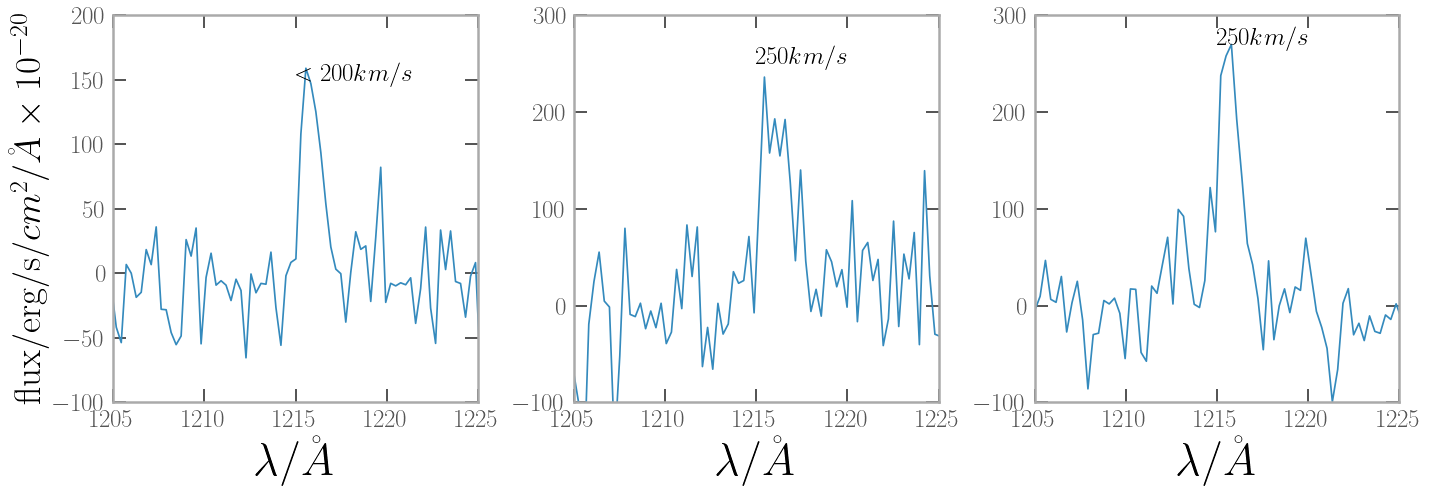

In [52]:
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import os

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
lw = 2.5
lfs = 45
tfs = 25

plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=tfs)
plt.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
plt.rcParams['mathtext.default'] = 'regular'

# Load and plot data for the first subplot
file1 = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-24_124005014.fits'))
MUSE1 = Table(file1[1].data)
axes[0].plot(MUSE1['WAVE_VAC'] /4.5699, MUSE1['FLUX'])
axes[0].set_xlim(1205, 1225)
axes[0].set_ylim(-100, 200)
axes[0].set_xticks([1205, 1210, 1215, 1220, 1225],fontsize=15)
# axes[0].set_yticks([-100, 0, 100, 200, 300, 400, 500, 600,700,800,900,1000])
axes[0].set_xlabel(r'$\lambda/\AA$', fontsize=lfs)
axes[0].set_ylabel(r'flux/erg/s/$cm^2/\AA \times10^{-20}$', fontsize=lfs-8)
axes[0].tick_params(which='major', direction='in', width=2, length=13, right=True, top=True, pad=7)
axes[0].tick_params(which='minor', direction='in', width=1, length=10, right=True, top=True)
axes[0].grid(False)
axes[0].annotate(r'$<200km/s$', xy =(1215, 150))

# Load and plot data for the second subplot
file2 = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-44_144008046.fits'))
MUSE2 = Table(file2[1].data)
axes[1].plot(MUSE2['WAVE_VAC'] /4.414, MUSE2['FLUX'])
axes[1].set_xlim(1205, 1225)
axes[1].set_ylim(-100, 300)
axes[1].set_xticks([1205, 1210, 1215, 1220, 1225])
axes[1].set_xlabel(r'$\lambda/\AA$', fontsize=lfs)
# axes[1].set_ylabel(r'flux/erg/s/$cm^2/\AA$', fontsize=lfs)
axes[1].tick_params(which='major', direction='in', width=2, length=13, right=True, top=True, pad=7)
axes[1].tick_params(which='minor', direction='in', width=1, length=10, right=True, top=True)
axes[1].grid(False)
axes[1].annotate(r'$250km/s$', xy =(1215, 250))

# Load and plot data for the third subplot
file3 = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-22_122011067.fits'))
MUSE3 = Table(file3[1].data)
axes[2].plot(MUSE3['WAVE_VAC'] /4.2914, MUSE3['FLUX'])
axes[2].set_xlim(1205, 1225)
axes[2].set_ylim(-100, 300)
axes[2].set_xticks([1205, 1210, 1215, 1220, 1225])
axes[2].set_xlabel(r'$\lambda/\AA$', fontsize=lfs)
# axes[2].set_ylabel(r'flux/erg/s/$cm^2/\AA$', fontsize=lfs)
axes[2].tick_params(which='major', direction='in', width=2, length=13, right=True, top=True, pad=7)
axes[2].tick_params(which='minor', direction='in', width=1, length=10, right=True, top=True)
axes[2].grid(False)
axes[2].annotate(r'$250km/s$', xy =(1215, 270))

# Adjust layout and spacing
plt.tight_layout(pad=0.5)

# Show or save the plot
# plt.show()  # Use plt.show() to display the plot
plt.savefig('lya2x3.pdf', format='pdf', dpi=600, bbox_inches='tight')  # Uncomment to save the plot


/tmp/ipykernel_1283660/3506962872.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_1283660/3506962872.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_1283660/3506962872.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_1283660/3506962872.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-s

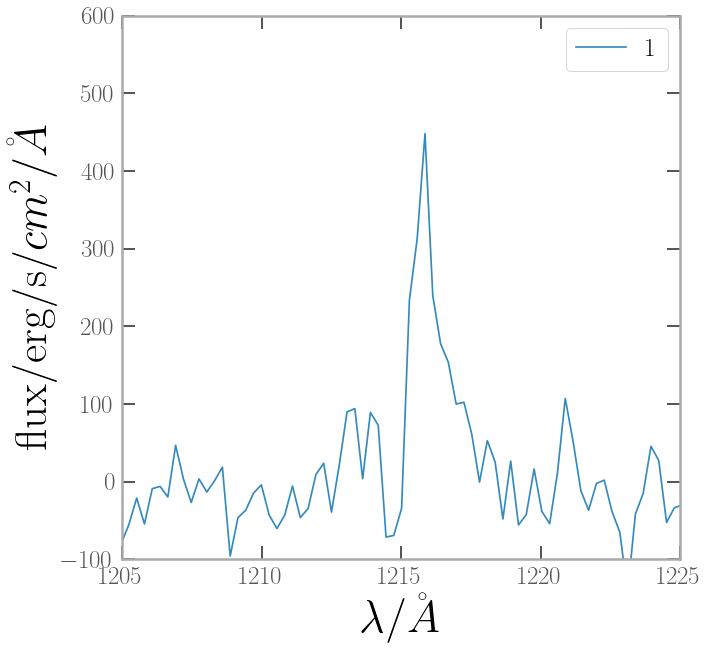

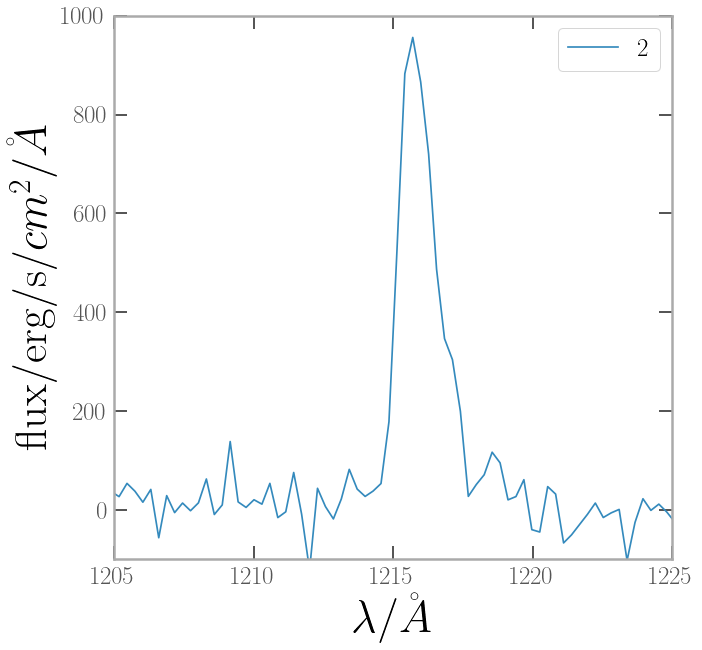

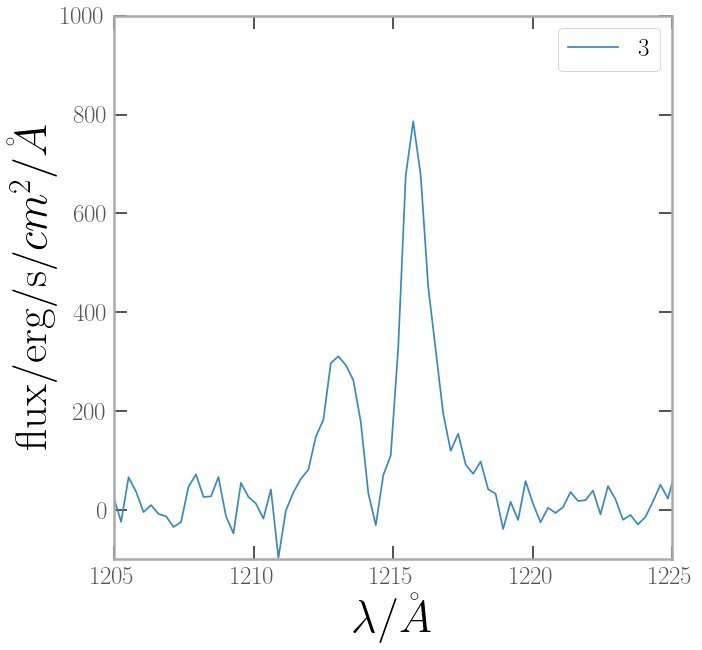

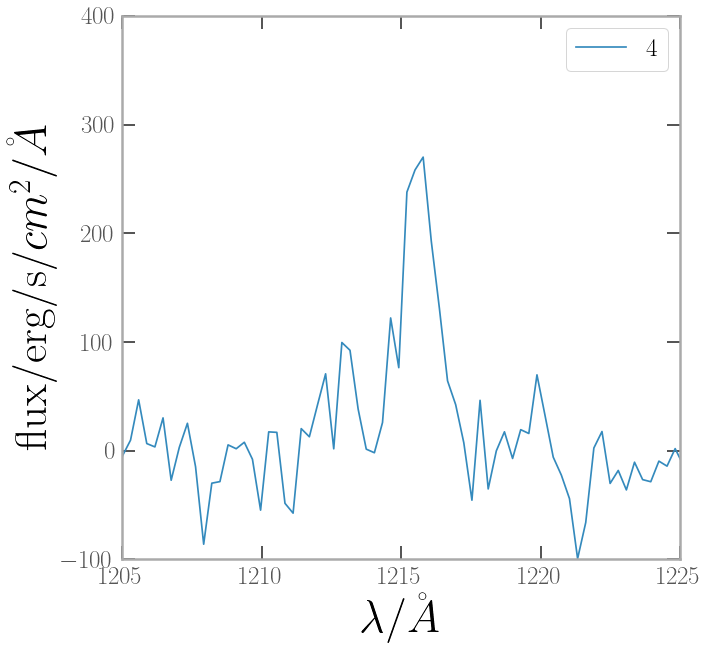

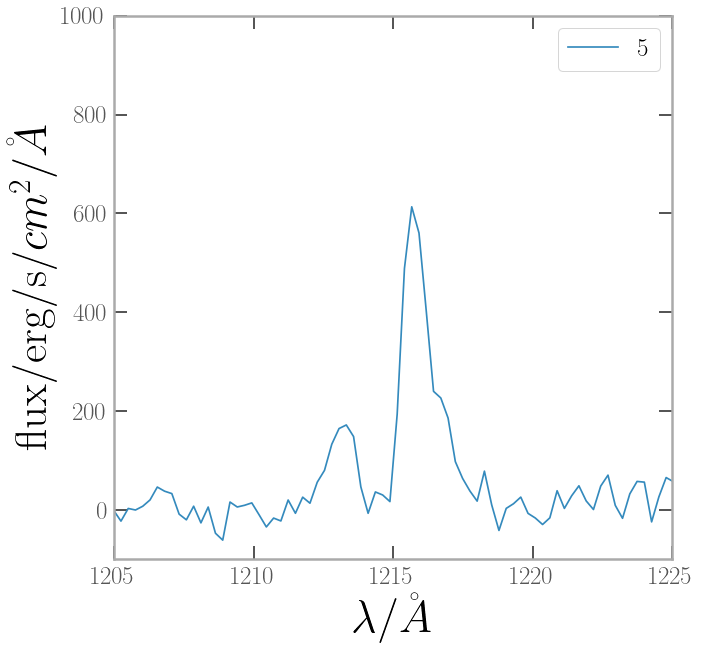

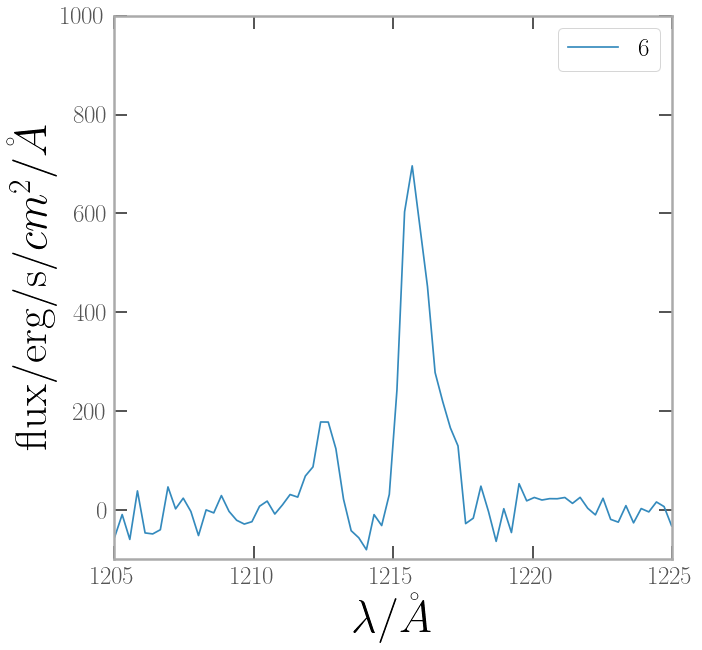

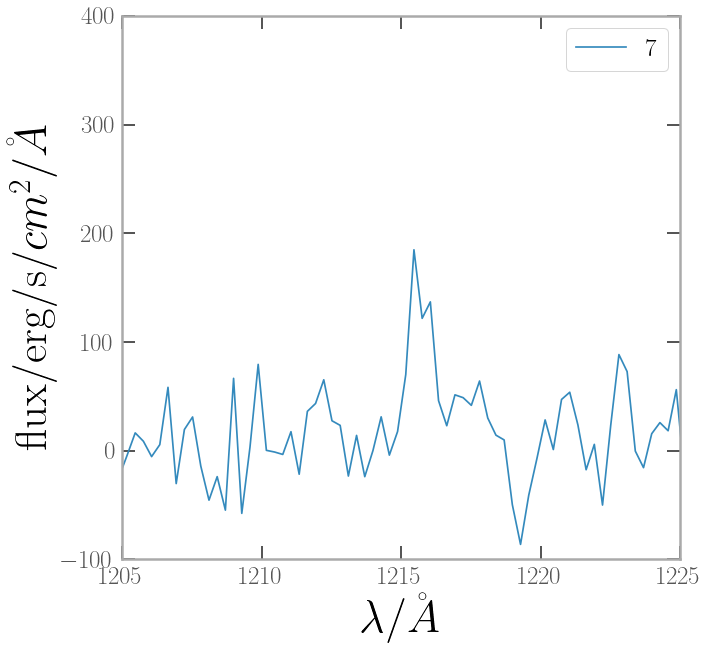

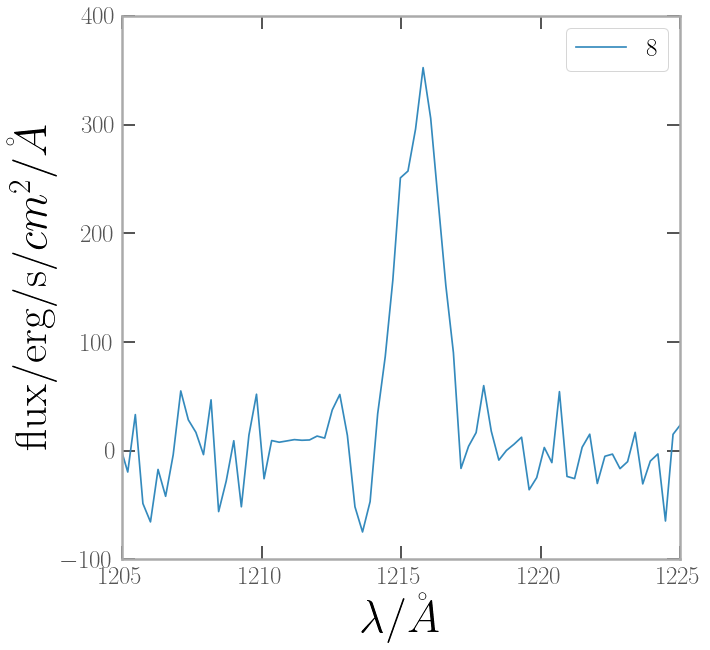

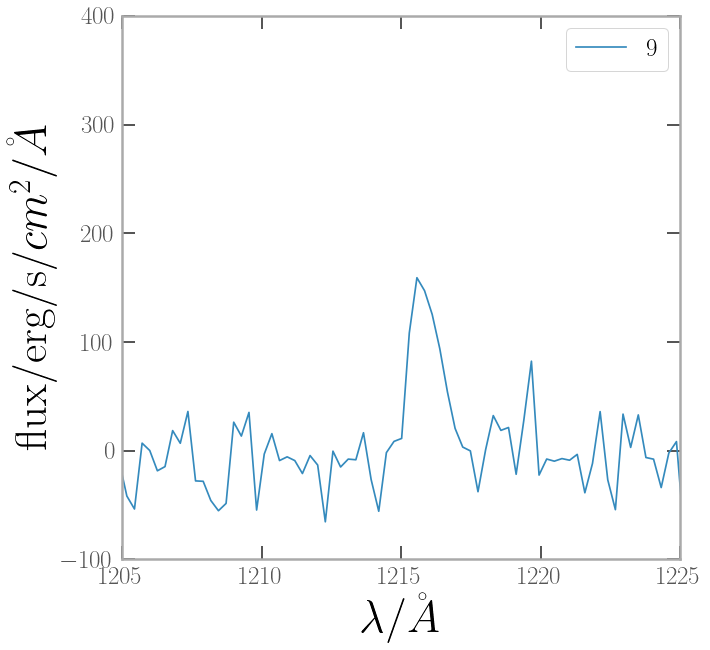

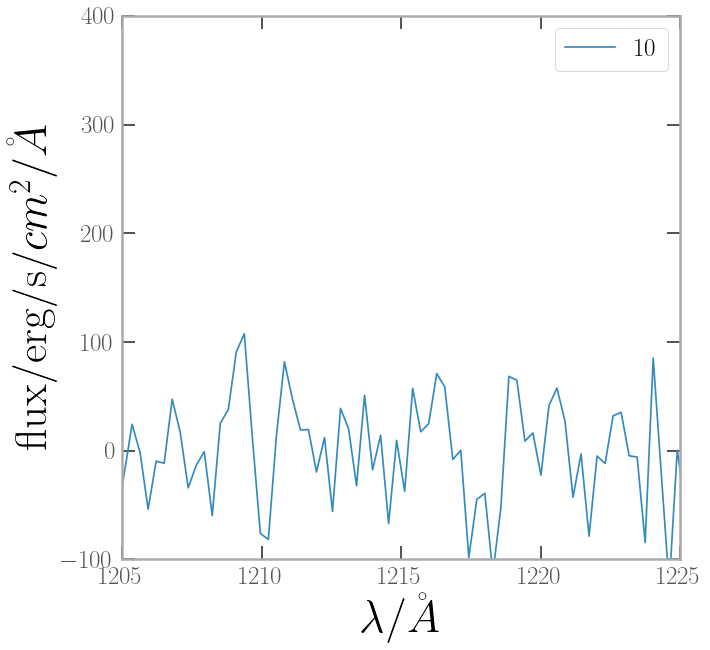

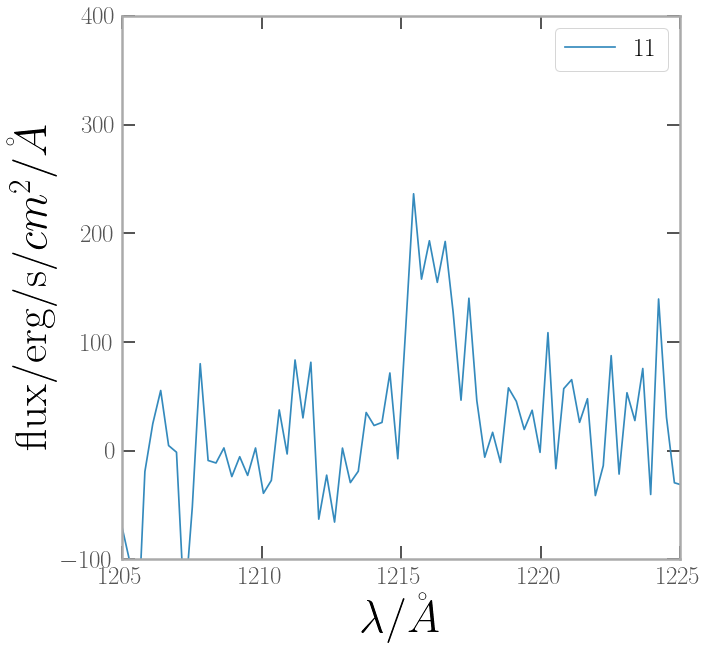

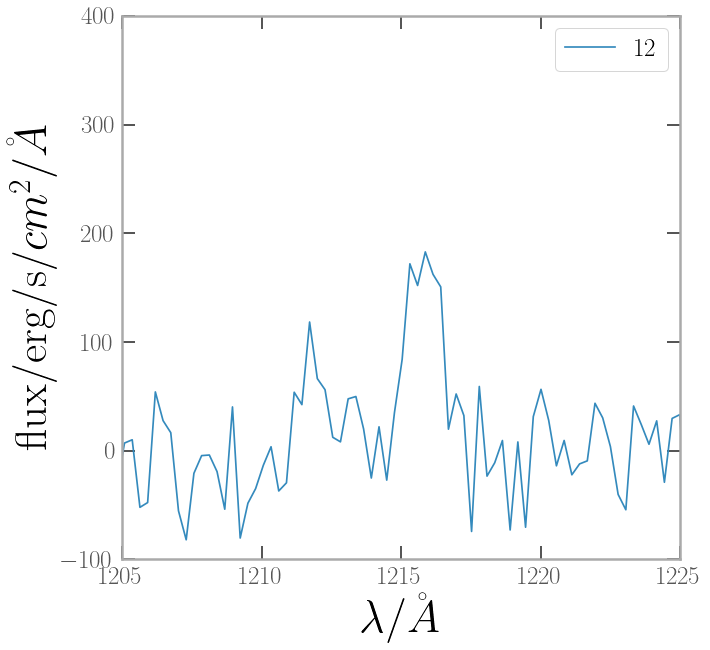

In [35]:
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=10,size_y=10):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-32_132014025.fits'))
MUSE0=Table(file[1].data)
# lux /erg/s/cm2/ ̊A
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$') #370km/s
# plt.figure(figsize=(16,10))
plt.plot(MUSE0['WAVE_VAC']/4.4767,MUSE0['FLUX'],label='1')
plt.xlim(1205,1225)
plt.ylim(-100,600)
plt.legend()
plt.savefig('lya1.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-06_106007033.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$') #<200
plt.plot(MUSE0['WAVE_VAC']/4.3947,MUSE0['FLUX'],label='2')
plt.xlim(1205,1225)
plt.ylim(-100,1000)
plt.legend()
plt.savefig('lya2.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-06_106014046.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$') #750
plt.plot(MUSE0['WAVE_VAC']/4.6569,MUSE0['FLUX'],label='3')
plt.xlim(1205,1225)
plt.ylim(-100,1000)
plt.legend()
plt.savefig('lya3.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-22_122011067.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$') #620
plt.plot(MUSE0['WAVE_VAC']/4.2914,MUSE0['FLUX'],label='4')
plt.xlim(1205,1225)
plt.ylim(-100,400)
plt.legend()
plt.savefig('lya4.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-22_122021111.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$') #750
plt.plot(MUSE0['WAVE_VAC']/4.7989,MUSE0['FLUX'],label='5')
plt.legend()
plt.xlim(1205,1225)
plt.ylim(-100,1000)
plt.savefig('lya5.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-23_123018120.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$') #750
plt.plot(MUSE0['WAVE_VAC']/4.5705,MUSE0['FLUX'],label='6')
plt.xlim(1205,1225)
plt.ylim(-100,1000)
plt.legend()
plt.savefig('lya6.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-02_102014087.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$')
plt.plot(MUSE0['WAVE_VAC']/4.2549,MUSE0['FLUX'],label='7')
plt.xlim(1205,1225)
plt.ylim(-100,400)
plt.legend()
plt.savefig('lya7.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-22_122013069.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$')
plt.plot(MUSE0['WAVE_VAC']/4.6061,MUSE0['FLUX'],label='8')
plt.xlim(1205,1225)
plt.ylim(-100,400)
plt.legend()
plt.savefig('lya8.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-24_124005014.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$')
plt.plot(MUSE0['WAVE_VAC']/4.5699,MUSE0['FLUX'],label='9')
plt.xlim(1205,1225)
plt.ylim(-100,400)
plt.legend()
plt.savefig('lya9.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-37_137015034.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$')
plt.plot(MUSE0['WAVE_VAC']/4.3513,MUSE0['FLUX'],label='10')
plt.xlim(1205,1225)
plt.ylim(-100,400)
plt.legend()
plt.savefig('lya10.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-44_144008046.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$')
plt.plot(MUSE0['WAVE_VAC']/4.414,MUSE0['FLUX'],label='11')
plt.xlim(1205,1225)
plt.ylim(-100,400)
plt.legend()
plt.savefig('lya11.png', format='png', dpi=600, bbox_inches='tight')
file = fits.open(os.path.expanduser('~/Downloads/Anshu/aper_spectrum_candels-cdfs-46_146016242.fits'))
MUSE0=Table(file[1].data)
fig,ax=FancyPlot(r'$\lambda /\AA$',r'flux/erg/s/$cm^2/\AA$')
plt.plot(MUSE0['WAVE_VAC']/4.5228,MUSE0['FLUX'],label='12')
plt.xlim(1205,1225)
plt.ylim(-100,400)
plt.legend()
plt.savefig('lya12.png', format='png', dpi=600, bbox_inches='tight')